# Natural Language Processing

Natural language processing is a branch of artificial intelligence and computational linguistics. It can be defined as the process which is involved in the interaction between a computer and natural language i.e the language, spoken by humans. It is directly related to the field of human-computer interaction. Now that natural language processing is properly 
defined, we will be using the following constraints of NLP to parse the information from the resumes

Morphology
Semantic Analyis
Syntatic Analysis
Lexical Analysis
Pragmetic
Closure

### CV Mining using NLP 

Natural language processing the tools for processing the Natural language. It's is process for automatic manipulating of natural language, like speech and text processing by a software.

## 1. Problem Statement

Recuitement Agencies and corporate companies numerous resumes daily, which is very tedious and time consuming task.Our purpose is to Design a model that can parse information from unstractured resumes and transform it to a strractured JSON format, Also, Present the extracted resumes to the employer, based on the job description.


## 2. INTRODUCTION

Recuitement Agencies and corporate companies numerous resumes daily.This no task for human to process thousands resumes a sortlist top 10 resumes.There should be a intelligent automated intelligent system will will take all unstractured resume and extract the useful information from resumes and also can rank the resumes on the based of job description. Parsed Infromation Inclue name, email, contact number, social profile, personal website, years of work experience, education,publications, certifications and keywords. We will perform some text precessing techniques on parsed resumes and save into csv or json format and perform and show results from that results into graphical format. Finally we will train a machine learning model and check the accuracy of our model.

## Data Collection and Preprocessing

Data collection and preprocessing is the first and forest step of Natural language processing.Data Pre-processing is the technique of data minnig which transform raw data into a comprehensive format. Data from the real world is mostly inadequate conflicting and contains innumerable errors. We are collecting the resumes from differnt resurces,from the perpose for learning like open course already collected and pre-processed and saved in json or csv format.
Data is passed through a series of steps in following sequences.


### Data cleaning

Processes, like filling in missing values, removing noisy data 

### Data Integration

Data consists of various representation, are clustred togather and clashes between data from diffrent are removed and convert into single format.

### Data Transforamtion

Data collected from diffrent resources is transformed into a single format.

### Data Reduction

The Objective of this step is to represent a contracted model in a wharehouse.

### Data Discretization

In this step, the number of values of an uninterrupted characteritic is reduced by the division of range of intevals of characteristic.

### Tokenization

Tokenization is the task of chopping off a provided character sequence and a detailed document unit. It does away with certain characters like punctuations and the chopped units are further called tokens.Tokens are unually refered to as terms of words, but sometimes fabricating of a type/token distinction is essential.

### Stemming

According to linguistic morphology and retrieval of information, stemming is the mechanism of lowering altered or derived words to their word stem, root or base. The stem shouldn't always match the morphological root of the words. It is satisfactory that relevant words map to the same stem even when the stem is not even a valid root.

### Lemmatization
In NLP, lemmatization is a procedure of organising the altered form of a word, such that their analysis can take place as a single term, identified by the word's dictionary form (lemma). In NLP, the procedure of concluding the lemma of a word depending upon its predetermined meaning. It depends on rightly identifying the predetermined part of speech and what a word in a sentence means, as well as in a bigger situation surrounding the sentences, which can include neighboring sentences, and even an entire document, which contradicts stemming. So, an algorithm of lemmatization is an open platform for research

#### Import necessory labrabries 

In [2]:
#import Nesessory libraries
import io
import os
import re
import nltk
import numpy as np
import pandas as pd
import docx2txt
from datetime import datetime
from dateutil import relativedelta
#from . import constants as cs
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFSyntaxError
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import constants as cs
import spacy

### Text from pdf

In [5]:
def extract_text_from_pdf(pdf_path):
    '''
    Helper function to extract the plain text from .pdf files

    :param pdf_path: path to PDF file to be extracted (remote or local)
    :return: iterator of string of extracted text
    '''
    # https://www.blog.pythonlibrary.org/2018/05/03/exporting-data-from-pdfs-with-python/
    if not isinstance(pdf_path, io.BytesIO):
        # extract text from local pdf file
        with open(pdf_path, 'rb') as fh:
            try:
                for page in PDFPage.get_pages(
                        fh,
                        caching=True,
                        check_extractable=True
                ):
                    resource_manager = PDFResourceManager()
                    fake_file_handle = io.StringIO()
                    converter = TextConverter(
                        resource_manager,
                        fake_file_handle,
                        codec='utf-8',
                        laparams=LAParams()
                    )
                    page_interpreter = PDFPageInterpreter(
                        resource_manager,
                        converter
                    )
                    page_interpreter.process_page(page)

                    text = fake_file_handle.getvalue()
                    #yield text
                    return text

                    # close open handles
                    converter.close()
                    fake_file_handle.close()
            except PDFSyntaxError:
                return
    else:
        # extract text from remote pdf file
        try:
            for page in PDFPage.get_pages(
                    pdf_path,
                    caching=True,
                    check_extractable=True
            ):
                resource_manager = PDFResourceManager()
                fake_file_handle = io.StringIO()
                converter = TextConverter(
                    resource_manager,
                    fake_file_handle,
                    codec='utf-8',
                    laparams=LAParams()
                )
                page_interpreter = PDFPageInterpreter(
                    resource_manager,
                    converter
                )
                page_interpreter.process_page(page)

                text = fake_file_handle.getvalue()
                #yield text 
                return text

                # close open handles
                converter.close()
                fake_file_handle.close()
        except PDFSyntaxError:
            return


In [6]:
#test our function
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    text_raw = extract_text_from_pdf(path)
    print(text_raw)
    #print('----------------------------')

 

 

Contact

mohamednassar2016@gmail.com

www.linkedin.com/in/
mohamednassar96 (LinkedIn)

Top Skills

Computer Vision

Data Analysis

Natural Language Processing (NLP)

Certifications

twitter hall of fame

Microsoft Hall of fame

Microsoft Students Stars
Competition

Yahoo hall of fame

 

Mohamed Nassar

Machine Learning Team Lead at Synapse Analytics|MSc Candidate
in Computer Communication Engineering at Cairo University | AI
Instructor
Giza

Summary

- AI Team Lead with 3 years of experience in Computer Vision

and Natural Language Processing handling the whole pipeline of

design, development, testing, and deployment into production.

Currently, Leading Azka-OCR Division in Synapse Analytics. Azka-

OCR is involved in Arabic Documents end-to-end analysis through

Document Detection, Layout Analysis, Text Extraction, OCR, and
finally Information Extraction.

Optical mark recognition (OMR)

- AI instructor.

Experience

Synapse Analytics
2 years 1 month

Machine Learning Team Lea

 

 

 

لاصتالا

eng.gamal.nafel@gmail.com

www.linkedin.com/in/gamal-nafel-
a85579225 (LinkedIn)

Gamal Nafel

DevOps Engineer
مالسلا لوأ مسق

تاراهملا لضفأ

Engineering

English

Administration

Languages

English (Professional Working)

زجوم

ةربخلا

Information Technology Institute (ITI)
DevOps Engineer
نارهش) ٢٠٢١ ربمفون‏ - ٢٠٢١ ربوتكأ‏)

I am passionate professional learner to  increase the value of my self

in this challenging market ready to take the extra mile.

ميلعتلا

Faculty  of Petroleum and Mining Engineering, Suez University

Bachelor's degree, Petroleum Engineering · (٢٠٢٠ ويام‏ - ٢٠١٥ ربوتكأ‏)

Information Technology Institute (ITI)

 · (٢٠٢١ ربمفون‏)

Page 1 of 1


لاصتالا

alnagar.ashraf545@gmail.com

www.linkedin.com/in/ashraf-
elnagar-1b2774190 (LinkedIn)

تاراهملا لضفأ

SQL

Python (Programming Language)

Data Analysis

Certifications

Python for Data Science

Machine Learning

IBM Watson V3

Mathematics for Machine Learning:
Linear Algebra

Artificial Intellig

Contact

01010483839 (Mobile)
ahmedelsyd5@gmail.com

www.linkedin.com/in/ahmed-
hindi-358a77123 (LinkedIn)
ahmedhindi.medium.com/ (Blog)

Top Skills

Python

Machine Learning

Data Science

Languages

English (Professional Working)

Arabic (Native or Bilingual)

Certifications

Applied Data Science with Python
Specialization

The Data Scientist’s Toolbox

Applied Plotting, Charting & Data
Representation in Python

Introduction to Probability and Data

Applied Text Mining in Python

 

 

 

Ahmed Hindi

Senior Machine Learning Engineer at Indeed.com
Cairo

Summary

Data Scientist familiar with gathering, cleaning, and organizing data

for use by technical and non-technical personnel. Due to working

for five years on Upwork, I have experience working with people

from different backgrounds, communicating the data at many levels

of abstraction dealing with tech and non-tech clients. And during

the five years, I was able to maintain a perfect record by finishing

all projects successfu

 

 

 

Contact

m.alisahib1515@gmail.com

www.linkedin.com/in/ali-shah-
b4b9031a7 (LinkedIn)

Top Skills

Microsoft Power BI

Power bi

BI Analyst

Ali Shah

Summary

Visualization.

Experience

Student at University of Engineering and Technology, Lahore
Lahore

I have 3 years of experience in power bi development and

DeepCloud
Business Intelligence Analyst
November 2019 - Present (2 years 2 months)

Education

University of Engineering and Technology, Lahore

BSCS, Web Page, Digital/Multimedia and Information Resources

Design · (2016 - 2020)

Page 1 of 1


 

 

 

Contact

+94772069832 (Mobile)
zhahmed95my@gmail.com

www.linkedin.com/in/ahmedzaroath
(LinkedIn)

Ahmed Zaroath

Undergraduate | B.Sc. in Information Technology | AI Enthusiast |
Deep Learning
Ampara District

Top Skills

English

Teamwork

Communication

Summary

IT Undergraduate, AI Enthusiast. 

A fast learner and a good team worker, able to work in different

circumstances and working environments. 

Have some wor

Contact

+923329369443 (Home)
hamzarizwan8822@gmail.com

www.linkedin.com/in/
hamzarizwan1 (LinkedIn)

Top Skills

Test Planning

Product Quality

Software Development

 

 

 

Hamza Rizwan

Software Quality Assurance Engineer at Red Buffer
Rawalpindi District

Summary

Enhancing real-life interactions through software.

Bs Computer Science with excellent experience in software quality

assurance with high-performance applications and services. My skill

set includes, but is not limited to,

- Develop a test plan and test strategy.

- Managing QA processes throughout the lifecycle of a project.

- Plan, develop and execute Test cases for each release.

- Client communication regarding requirements, milestones, and

releases.

requests.

- Coordination and communication with the off-shore team regarding

product features and bugs.

- Review specification requirements, design documents, and change

- Analyze and evaluate business logic for products and identify gaps

between product dev

 

 

 

لاصتالا

aliwagdy2580@gmail.com

www.linkedin.com/in/ali-wagdy-
a01510196 (LinkedIn)

Ali Wagdy

Machine Learning | Deep Learning | NLP
رصم

زجوم

تاراهملا لضفأ

machine learning

Deep Learning

Natural language processing

(NLP)

I'm a software engineer adept at analyzing datasets, machine

learning algorithms , deep learning and natural language processing

Hoping to become a valuable asset in any organization that I join

Languages

English (Professional Working)

ىبرع (Native or Bilingual)

Certifications

machine learning nanodegree 

Python 3: Programming beginner to
advanced

machine learning 

Neural Networks and Deep Learning

Contestant at ACM-ICPC

Honors-Awards

Participated at ACM Egyptian
Collegiate Programming Contest

ةربخلا

iNetworks
Machine Learning Intern
٢٠٢١ ربوتكأ‏ - Present (3 روهش)

ميلعتلا

MET

Computer Science · (2018 - 2022)

Stanford University

machine learning 

Page 1 of 1


 

 

 

Contact

elhamamsy.m.a@gmail.com

www.linkedin.com/in/melham

In [7]:
def get_number_of_pages(file_name):
    try:
        if isinstance(file_name, io.BytesIO):
            # for remote pdf file
            count = 0
            for page in PDFPage.get_pages(file_name,caching=True,check_extractable=True):
                count += 1
            return count
        else:
            # for local pdf file
            if file_name.endswith('.pdf'):
                count = 0
                with open(file_name, 'rb') as fh:
                    for page in PDFPage.get_pages(
                        fh,
                        caching=True,
                        check_extractable=True
                    ):
                        count += 1
                return count
            else:
                return None
    except PDFSyntaxError:
        return None


In [10]:
## test get_number_of_pages function
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    #print(path)
    noOfLines = get_number_of_pages(path)
    print(noOfLines)
    print('----------------------------')

2
----------------------------
1
----------------------------
2
----------------------------
2
----------------------------
1
----------------------------
1
----------------------------
2
----------------------------
2
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
3
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
2
----------------------------
2
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
1
----------------------------
2
----------------------------
2
----------------------------
1
----------------------------
1
------

In [11]:
## Extract text from word document
def extract_text_from_docx(doc_path):
    '''
    Helper function to extract plain text from .docx files

    :param doc_path: path to .docx file to be extracted
    :return: string of extracted text
    '''
    try:
        temp = docx2txt.process(doc_path)
        text = [line.replace('\t', ' ') for line in temp.split('\n') if line]
        return ' '.join(text)
    except KeyError:
        return ' '


In [12]:
## test for single resume
extract_text_from_docx('Huma.doc')

'Huma Arzo CONTACT Address: House #1, Street # 22, New Gulshan Park Lahore Phone: 03240016169 (Primary)  Email: arzo.alye@gmail.com TECHNICAL SKILLS C/C++ Programming OOP (Expert) Java SQL Web App Development Firebase MS Office PROFESSIONAL SKILLS Team Player Leadership  Good Communication skills Self-Motivated Time Management LEADERSHIP ACTIVITIES Class Leader  QUALIFICATION   Virtual University of Pakistan                CGPA:  2.89  BS computer Science    Punjab Group of Colleges                  Marks: 700/1050  ICS (phy, math, comp) ACADEMIC PROJECT  Qatra Blood Bank I developed an online blood bank app that makes easy for the patients to search for blood. Donors can easily get register themselves and can donate blood which can be helpful in others lifesaving.  Online Chatting App During study in KICS UET I have worked on developing a chatting app like WhatsApp where user can send messages photos, audio, videos, documents and voice notes also. Professional Certifications Mobile Ap

In [14]:
# fro now i have not collected text data test it later
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    print(resume)
    path='data/'+resume
    raw_text = extract_text_from_docx(path)
    print(raw_text)
    print('----------------------------')

Profile (1).pdf


BadZipFile: File is not a zip file

In [126]:
## generalized method with extract text from files , .pdf,.docx and .doc file,
def extract_text(file_path, extension):
    '''
    Wrapper function to detect the file extension and call text
    extraction function accordingly

    :param file_path: path of file of which text is to be extracted
    :param extension: extension of file `file_name`
    '''
    text = ''
    if extension == '.pdf':
        for page in extract_text_from_pdf(file_path):
            text += ' ' + page
    elif extension == '.docx':
        text = extract_text_from_docx(file_path)
    elif extension == '.doc':
        text = extract_text_from_doc(file_path)
    return text

In [127]:
def extract_entity_sections_grad(text):
    '''
    Helper function to extract all the raw text from sections of
    resume specifically for graduates and undergraduates

    :param text: Raw text of resume
    :return: dictionary of entities
    '''
    text_split = [i.strip() for i in text.split('\n')]
    # sections_in_resume = [i for i in text_split if i.lower() in sections]
    entities = {}
    key = False
    for phrase in text_split:
        if len(phrase) == 1:
            p_key = phrase
        else:
            p_key = set(phrase.lower().split()) & set(cs.RESUME_SECTIONS_GRAD)
        try:
            p_key = list(p_key)[0]
        except IndexError:
            pass
        if p_key in cs.RESUME_SECTIONS_GRAD:
            entities[p_key] = []
            key = p_key
        elif key and phrase.strip():
            entities[key].append(phrase)

    # entity_key = False
    # for entity in entities.keys():
    #     sub_entities = {}
    #     for entry in entities[entity]:
    #         if u'\u2022' not in entry:
    #             sub_entities[entry] = []
    #             entity_key = entry
    #         elif entity_key:
    #             sub_entities[entity_key].append(entry)
    #     entities[entity] = sub_entities

    # pprint.pprint(entities)

    # make entities that are not found None
    # for entity in cs.RESUME_SECTIONS:
    #     if entity not in entities.keys():
    #         entities[entity] = None
    return entities


In [132]:
import string
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    #print(raw_text)
    get_the_entity_sections =extract_entity_sections_grad(raw_text)
    #print(get_the_entity_sections)
    # Convert all strings to lowercase
    #text = raw_text.lower()

    # Remove numbers
    #text = re.sub(r'\d+','',text)

    # Remove punctuation
    #text = text.translate(str.maketrans('','',string.punctuation))
    #print('----------------------------')

In [45]:
terms = {'Quality/Six Sigma':['black belt','capability analysis','control charts','doe','dmaic','fishbone',
                              'gage r&r', 'green belt','ishikawa','iso','kaizen','kpi','lean','metrics',
                              'pdsa','performance improvement','process improvement','quality',
                              'quality circles','quality tools','root cause','six sigma',
                              'stability analysis','statistical analysis','tqm'],      
        'Operations management':['automation','bottleneck','constraints','cycle time','efficiency','fmea',
                                 'machinery','maintenance','manufacture','line balancing','oee','operations',
                                 'operations research','optimization','overall equipment effectiveness',
                                 'pfmea','process','process mapping','production','resources','safety',
                                 'stoppage','value stream mapping','utilization'],
        'Supply chain':['abc analysis','apics','customer','customs','delivery','distribution','eoq','epq',
                        'fleet','forecast','inventory','logistic','materials','outsourcing','procurement',
                        'reorder point','rout','safety stock','scheduling','shipping','stock','suppliers',
                        'third party logistics','transport','transportation','traffic','supply chain',
                        'vendor','warehouse','wip','work in progress'],
        'Project management':['administration','agile','budget','cost','direction','feasibility analysis',
                              'finance','kanban','leader','leadership','management','milestones','planning',
                              'pmi','pmp','problem','project','risk','schedule','scrum','stakeholders'],
        'Data analytics':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
         'Data Science':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
         'Machine Learning':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
         'Software Engineernig':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
         'System Security':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
        'Healthcare':['adverse events','care','clinic','cphq','ergonomics','healthcare',
                      'health care','health','hospital','human factors','medical','near misses',
                      'patient','reporting system']}

In [46]:
# Initializie score counters for each area
quality = 0
operations = 0
supplychain = 0
project = 0
data = 0
healthcare = 0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys():
        
    if area == 'Quality/Six Sigma':
        for word in terms[area]:
            if word in text:
                quality +=1
        scores.append(quality)
        
    elif area == 'Operations management':
        for word in terms[area]:
            if word in text:
                operations +=1
        scores.append(operations)
        
    elif area == 'Supply chain':
        for word in terms[area]:
            if word in text:
                supplychain +=1
        scores.append(supplychain)
        
    elif area == 'Project management':
        for word in terms[area]:
            if word in text:
                project +=1
        scores.append(project)
        
    elif area == 'Data analytics':
        for word in terms[area]:
            if word in text:
                data +=1
        scores.append(data)
        
    else:
        for word in terms[area]:
            if word in text:
                healthcare +=1
        scores.append(healthcare)

In [47]:
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Data analytics,6
Operations management,2
Quality/Six Sigma,0
Supply chain,0
Project management,0
Healthcare,0


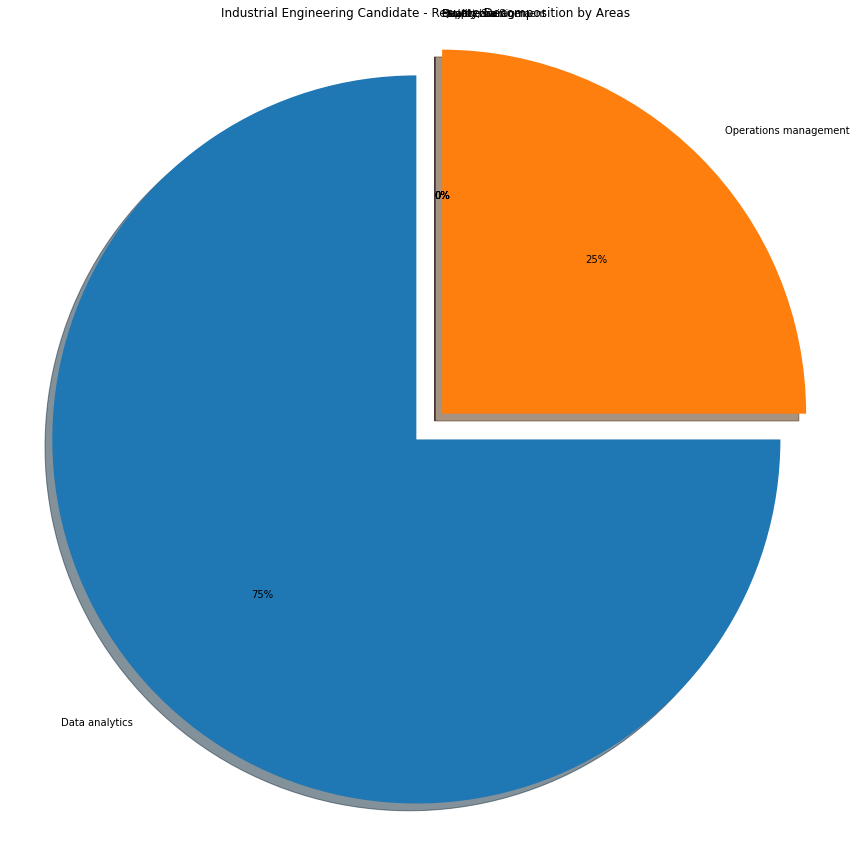

In [49]:
# Create pie chart visualization
pie = plt.figure(figsize=(15,15))
plt.pie(summary['score'], labels=summary.index, explode = (0.1,0,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Industrial Engineering Candidate - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()

# Save pie chart as a .png file
pie.savefig('resume_screening_results.png')

In [107]:
def extract_entities_wih_custom_model(custom_nlp_text):
    '''
    Helper function to extract different entities with custom
    trained model using SpaCy's NER

    :param custom_nlp_text: object of `spacy.tokens.doc.Doc`
    :return: dictionary of entities
    '''
    entities = {}
    for ent in custom_nlp_text.ents:
        if ent.label_ not in entities.keys():
            entities[ent.label_] = [ent.text]
        else:
            entities[ent.label_].append(ent.text)
    for key in entities.keys():
        entities[key] = list(set(entities[key]))
    return entities


In [108]:
import string
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    print(raw_text)
    get_the_entity_sections =extract_entities_wih_custom_model(raw_text)
    print(get_the_entity_sections)

   
 
   
 
 C o n t a c t 
 
 m o h a m e d n a s s a r 2 0 1 6 @ g m a i l . c o m 
 
 w w w . l i n k e d i n . c o m / i n / 
 m o h a m e d n a s s a r 9 6   ( L i n k e d I n ) 
 
 T o p   S k i l l s 
 
 C o m p u t e r   V i s i o n 
 
 D a t a   A n a l y s i s 
 
 N a t u r a l   L a n g u a g e   P r o c e s s i n g   ( N L P ) 
 
 C e r t i f i c a t i o n s 
 
 t w i t t e r   h a l l   o f   f a m e 
 
 M i c r o s o f t   H a l l   o f   f a m e 
 
 M i c r o s o f t   S t u d e n t s   S t a r s 
 C o m p e t i t i o n 
 
 Y a h o o   h a l l   o f   f a m e 
 
   
 
 M o h a m e d   N a s s a r 
 
 M a c h i n e   L e a r n i n g   T e a m   L e a d   a t   S y n a p s e   A n a l y t i c s | M S c   C a n d i d a t e 
 i n   C o m p u t e r   C o m m u n i c a t i o n   E n g i n e e r i n g   a t   C a i r o   U n i v e r s i t y   |   A I 
 I n s t r u c t o r 
 G i z a 
 
 S u m m a r y 
 
 -   A I   T e a m   L e a d   w i t h   3   y e a r s   o f   e x p e r i e

AttributeError: 'str' object has no attribute 'ents'

In [86]:
def get_total_experience(experience_list):
    '''
    Wrapper function to extract total months of experience from a resume

    :param experience_list: list of experience text extracted
    :return: total months of experience
    '''
    exp_ = []
    for line in experience_list:
        experience = re.search(
            r'(?P<fmonth>\w+.\d+)\s*(\D|to)\s*(?P<smonth>\w+.\d+|present)',
            line,
            re.I
        )
        if experience:
            exp_.append(experience.groups())
    total_exp = sum(
        [get_number_of_months_from_dates(i[0], i[2]) for i in exp_]
    )
    total_experience_in_months = total_exp
    return total_experience_in_months



In [87]:
def get_number_of_months_from_dates(date1, date2):
    '''
    Helper function to extract total months of experience from a resume

    :param date1: Starting date
    :param date2: Ending date
    :return: months of experience from date1 to date2
    '''
    if date2.lower() == 'present':
        date2 = datetime.now().strftime('%b %Y')
    try:
        if len(date1.split()[0]) > 3:
            date1 = date1.split()
            date1 = date1[0][:3] + ' ' + date1[1]
        if len(date2.split()[0]) > 3:
            date2 = date2.split()
            date2 = date2[0][:3] + ' ' + date2[1]
    except IndexError:
        return 0
    try:
        date1 = datetime.strptime(str(date1), '%b %Y')
        date2 = datetime.strptime(str(date2), '%b %Y')
        months_of_experience = relativedelta.relativedelta(date2, date1)
        months_of_experience = (months_of_experience.years
                                * 12 + months_of_experience.months)
    except ValueError:
        return 0
    return months_of_experience



In [109]:
def extract_entity_sections_professional(text):
    '''
    Helper function to extract all the raw text from sections of
    resume specifically for professionals

    :param text: Raw text of resume
    :return: dictionary of entities
    '''
    text_split = [i.strip() for i in text.split('\n')]
    entities = {}
    key = False
    for phrase in text_split:
        if len(phrase) == 1:
            p_key = phrase
        else:
            p_key = set(phrase.lower().split()) \
                    & set(cs.RESUME_SECTIONS_PROFESSIONAL)
        try:
            p_key = list(p_key)[0]
        except IndexError:
            pass
        if p_key in cs.RESUME_SECTIONS_PROFESSIONAL:
            entities[p_key] = []
            key = p_key
        elif key and phrase.strip():
            entities[key].append(phrase)
    return entities


In [110]:
import string
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    print(raw_text)
    get_the_entity_sections =extract_entity_sections_professional(raw_text)
    print(get_the_entity_sections)

   
 
   
 
 C o n t a c t 
 
 m o h a m e d n a s s a r 2 0 1 6 @ g m a i l . c o m 
 
 w w w . l i n k e d i n . c o m / i n / 
 m o h a m e d n a s s a r 9 6   ( L i n k e d I n ) 
 
 T o p   S k i l l s 
 
 C o m p u t e r   V i s i o n 
 
 D a t a   A n a l y s i s 
 
 N a t u r a l   L a n g u a g e   P r o c e s s i n g   ( N L P ) 
 
 C e r t i f i c a t i o n s 
 
 t w i t t e r   h a l l   o f   f a m e 
 
 M i c r o s o f t   H a l l   o f   f a m e 
 
 M i c r o s o f t   S t u d e n t s   S t a r s 
 C o m p e t i t i o n 
 
 Y a h o o   h a l l   o f   f a m e 
 
   
 
 M o h a m e d   N a s s a r 
 
 M a c h i n e   L e a r n i n g   T e a m   L e a d   a t   S y n a p s e   A n a l y t i c s | M S c   C a n d i d a t e 
 i n   C o m p u t e r   C o m m u n i c a t i o n   E n g i n e e r i n g   a t   C a i r o   U n i v e r s i t y   |   A I 
 I n s t r u c t o r 
 G i z a 
 
 S u m m a r y 
 
 -   A I   T e a m   L e a d   w i t h   3   y e a r s   o f   e x p e r i e

   
 
   
 
   
 
 C o n t a c t 
 
 z o r o 4 1 1 1 1 @ g m a i l . c o m 
 
 w w w . l i n k e d i n . c o m / i n / 
 m o h a m e d - 1 8 4 5 2 6 2 0 1   ( L i n k e d I n ) 
 
 M o h a m e d   M o s t a f a 
 
 D a t a   A n a l y s t   a t   F r e e l a n c e r . c o m 
 C a i r o 
 
 T o p   S k i l l s 
 
 D a t a   A n a l y s i s 
 
 D a t a   S c i e n c e 
 
 D a t a   V i s u a l i z a t i o n 
 
 C e r t i f i c a t i o n s 
 
 W h a t   i s   D e e p   L e a r n i n g 
 
 B e c o m e   a   D a t a   A n a l y s t 
 
 T a b l e a u   E s s e n t i a l   T r a i n i n g   ( 2 0 2 0 . 1 ) 
 
 E x c e l   S t a t i s t i c s   E s s e n t i a l   T r a i n i n g :   1 
 
 D e m y s t i f y i n g   A I / M L / D L 
 
 S u m m a r y 
 
 I   m     e n g i n e e r i n g   g r a d u a t e   w i t h   p a s s i o n   f o r   s o l v i n g   t h e   p r o b l e m s   i n 
 
 d a t a   a n a l y s e s   , i     w o r k   i n   d a t a   a n a l y s i s   
 
 p r o j e c t s   , I   m

   
 
   
 
 C o n t a c t 
 
 T a n t a - A l   G h a r b i y a h -   E g y p t 
 0 1 0 1 8 1 9 1 8 7 2   ( M o b i l e ) 
 s a k r a 7 2 6 5 @ g m a i l . c o m 
 
 w w w . l i n k e d i n . c o m / i n / a h m e d - - s a k r 
 ( L i n k e d I n ) 
 g i t h u b . c o m / s a a a k e e e r   ( P e r s o n a l ) 
 w w w . k a g g l e . c o m / a h m e d s a k r 2 2 
 ( P e r s o n a l ) 
 w w w . u p w o r k . c o m / f r e e l a n c e r s / 
 ~ 0 1 7 a 9 2 d 0 f e 9 e 5 e 9 5 1 4   ( P e r s o n a l ) 
 
 T o p   S k i l l s 
 
 D e e p   L e a r n i n g 
 
 D a t a   V i s u a l i z a t i o n 
 
 M a c h i n e   L e a r n i n g 
 
   
 
 A h m e d   S a k r 
 
 A I   T r a i n e e   a t   I n f o r m a t i o n   T e c h n o l o g y   I n s t i t u t e   ( I T I ) 
 C a i r o 
 
 S u m m a r y 
 
 ➢   M o t i v a t e d ,   A u t o n o m o u s ,   H a r d   w o r k e r   a n d   g o o d   t e a m   m e m b e r . 
 
 ➢   E x p e r i e n c e d   i n   q u i c k l y   m a s t e r i n g  

 C o n t a c t 
 
 6   o c t o b e r ,   g i z a 
 0 1 1 1 3 7 0 9 0 7 2   ( M o b i l e ) 
 r e d a m a h m o u d 7 2 2 @ g m a i l . c o m 
 
 w w w . l i n k e d i n . c o m / i n / 
 m a h m o u d 3 8 9 9   ( L i n k e d I n ) 
 g i t h u b . c o m / M A H M O U D R R 7 0 7 
 ( P e r s o n a l ) 
 
 T o p   S k i l l s 
 
 L e a d e r s h i p 
 
 A r d u i n o 
 
 E l e c t r o n i c s 
 
 C e r t i f i c a t i o n s 
 
 C o n v o l u t i o n a l   N e u r a l   N e t w o r k s 
 
 H C I A - A I 
 
 S t r u c t u r i n g   M a c h i n e   L e a r n i n g 
 P r o j e c t s 
 
 C o m p u t e r   V i s i o n   B a s i c s 
 
 I n t r o d u c t i o n   t o   I n t e r n e t   o f   t h i n g s 
 
   
 
   
 
   
 
 M a h m o u d   R e d a 
 
 M a c h i n e   L e a r n i n g   E n g i n e e r 
 C a i r o 
 
 S u m m a r y 
 
 M a j o r i n g   i n   C o m p u t e r   E n g i n e e r i n g ,   a   t e c h n o l o g y   a n d   s c i e n c e 
 
 e n t h u s i a s t   w i t h   t h e   a b

   
 
   
 
 C o n t a c t 
 
 a m a r g a m a l 8 3 2 9 0 9 @ g m a i l . c o m 
 
 w w w . l i n k e d i n . c o m / i n / a m a r - 
 g a m a l - 3 a 3 b a b 2 1 4   ( L i n k e d I n ) 
 
 T o p   S k i l l s 
 
 C o m p u t e r   S c i e n c e 
 
 P r o j e c t   M a n a g e m e n t 
 
 E d u c a t i o n 
 
   
 
 a m a r   g a m a l 
 
 S t u d e n t   a t   c o m p u t e r   s c i e n c e   2 n d   y e a r   b a n i   s u w e f   u n i v e r s i t y 
 M a r k a z   N a s s e r 
 
 E d u c a t i o n 
 
 b a n i   s u w e f 
 
 3 . 0 5 ,   C o m p u t e r   S c i e n c e   ·   ( 2 0 2 0   -   2 0 2 4 ) 
 
 P a g e   1   o f   1 
 
 
{}
   
 
   
 
   
 
 H o s s a m   H a s s a n 
 
 A I   |   M a c h i n e   L e a r n i n g 
 C a i r o 
 
 E d u c a t i o n 
 
 K a f r   E l - S h e i k h   U n i v e r s i t y 
 
 B a c h e l o r ' s   d e g r e e ,   C o m p u t e r   S c i e n c e 
 
 C o n t a c t 
 
 K a f r E l s h e i k h 
 0 1 0 0 1 6 4 1 7 1 9   ( M o b i l e ) 
 H o s a

   
 
   
 
   
 
 C o n t a c t 
 
 a m r e l a g o z @ o u t l o o k . c o m 
 
 w w w . l i n k e d i n . c o m / i n / a m r e l a g o z 
 ( L i n k e d I n ) 
 
 C e r t i f i c a t i o n s 
 
 A W S   M a c h i n e   L e a r n i n g   F o u n d a t i o n s 
 
 I n t e r m e d i a t e   P y t h o n 
 
 I n t r o d u c t i o n   t o   D a t a   V i s u a l i z a t i o n 
 w i t h   P l o t l y   i n   P y t h o n 
 
 A m r   E l   A g o z 
 
 A r t i f i c i a l   I n t e l l i g e n c e   I n t e r n   a t   I T I   |   M a c h i n e   L e a r n i n g   E n g i n e e r   | 
 E m b e d d e d   S y s t e m s   E n g i n e e r 
 E g y p t 
 
 S u m m a r y 
 
 F r e s h   g r a d u a t e   e m b e d d e d   s y s t e m s   e n g i n e e r ,   w o r k e d   w i t h   v a r i o u s 
 
 p l a t f o r m s   a n d   p r o g r a m m i n g   l a n g u a g e s   i n c l u d i n g : 
 
 I n t r o d u c t i o n   t o   P y t h o n 
 
 M i c r o c o n t r o l l e r s :   A V R ,   T i v a   C  

 T o p   S k i l l s 
 
 A J A X 
 
 H T M L   5 
 
 C S S 
 
 L a n g u a g e s 
 
 E n g l i s h 
 
 U r d u 
 
   
 
   
 
   
 
 C o n t a c t 
 
 A l i   G a r d e n   B l o c k   A ,   S t r e e t # 1 , 
 H o u s e # 2   ,   F a i s a l a b a d ,   P a k i s t a n 
 + 9 2 3 2 1 7 8 6 5 5 1 0   ( M o b i l e ) 
 s a j i d a l i 2 4 4 4 @ g m a i l . c o m 
 
 S a j i d   A l i 
 
 L e a d   S o f t w a r e   E n g i n e e r ,   F u l l   s t a c k   ( . N E T   |   M E R N ) 
 L a h o r e   D i s t r i c t 
 
 w w w . l i n k e d i n . c o m / i n / s a j i d a l i 2 4 4 4 
 ( L i n k e d I n ) 
 
 S u m m a r y 
 
 I ' m   a   p a s s i o n a t e   a n d   p r a g m a t i c   s o f t w a r e   e n g i n e e r   w i t h   1 0   y e a r s 
 
 o f   p r o f e s s i o n a l   e x p e r i e n c e ,   s p e c i a l i z i n g   i n   f u l l - s t a c k   d e v e l o p m e n t 
 
 u s i n g   M i c r o s o f t   T e c h n o l o g i e s   o n   t h e   b a c k e n d .   S t r o n g   i n

   
 
   
 
   
 
 C o n t a c t 
 
 C a i r o   ,   E g y p t 
 0 1 1 2 0 4 3 5 5 7 7   ( M o b i l e ) 
 e y a d m o h a m m e d 1 1 7 @ g m a i l . c o m 
 
 E y a d   M o h a m m e d 
 
 M L   |   D L   |   C o m p u t e r   v i s i o n 
 E l   O b o u r 
 
 w w w . l i n k e d i n . c o m / i n / e y a d - 
 m o h a m m e d - 7 0 8 2 7 2 1 b b   ( L i n k e d I n ) 
 g i t h u b . c o m / e y a d - p y   ( O t h e r ) 
 
 S u m m a r y 
 
 T o p   S k i l l s 
 
 M a c h i n e   L e a r n i n g 
 
 P y t h o n   ( P r o g r a m m i n g   L a n g u a g e ) 
 
 O b j e c t - O r i e n t e d   P r o g r a m m i n g 
 ( O O P ) 
 
 L a n g u a g e s 
 
 G e r m a n   ( E l e m e n t a r y ) 
 
 E n g l i s h   ( P r o f e s s i o n a l   W o r k i n g ) 
 
 A r a b i c   ( N a t i v e   o r   B i l i n g u a l ) 
 
 C e r t i f i c a t i o n s 
 
 B e i n g   u n i q u e   i n   y o u r   c a r e e r 
 
 I n t r o d u c t i o n   t o   t h e   I n t e r n e t   o f   T h i n g s 
 a n

   
 
   
 
   
 
 F a t i m a   I m r a n 
 
 | |   W e b   d e v e l o p e r   | | 
 F a i s a l a b a d   D i s t r i c t 
 
 E x p e r i e n c e 
 
 I c o n s o l s 
 I n t e r n 
 S e p t e m b e r   2 0 2 1   -   P r e s e n t   ( 4   m o n t h s ) 
 F a i s a l a b a d ,   P u n j a b ,   P a k i s t a n 
 
 C o n t a c t 
 
 f a t i m a i m r a n 1 4 4 1 @ g m a i l . c o m 
 
 w w w . l i n k e d i n . c o m / i n / f a t i m a - 
 i m r a n - 2 9 3 4 0 1 2 2 0   ( L i n k e d I n ) 
 
 T o p   S k i l l s 
 
 J a v a S c r i p t 
 
 W e b   D e v e l o p m e n t 
 
 P H P 
 
 L a n g u a g e s 
 
 E n g l i s h 
 
 U r d u   ( F u l l   P r o f e s s i o n a l ) 
 
 E d u c a t i o n 
 
 G o v e r n m e n t     C o l l e g e   U n i v e r s i t y ,   F a i s a l a b a d 
 
 B a c h e l o r ' s   d e g r e e ,   I n f o r m a t i o n   T e c h n o l o g y   ·   ( O c t o b e r   2 0 2 0   -   J u n e   2 0 2 4 ) 
 
 G o v e r n m e n t     C o l l e g e   U n i v e r s i t y ,

 C o n t a c t 
 
 0 1 0 6 2 9 6 1 0 0 8   ( M o b i l e ) 
 t i t o o a l i 0 6 0 @ g m a i l . c o m 
 
 w w w . l i n k e d i n . c o m / i n / a h m e d - a l i - 
 o m a r - 6 4 9 b b 2 1 9 5   ( L i n k e d I n ) 
 w w w . f a c e b o o k . c o m / p r o f i l e . p h p 
 ( P e r s o n a l ) 
 w w w . i n s t a g r a m . c o m / t i t o o _ a l i 
 ( P e r s o n a l ) 
 
 T o p   S k i l l s 
 
 C o m m u n i c a t i o n 
 
 T e a m w o r k 
 
 E n g l i s h 
 
 L a n g u a g e s 
 
 G e r m a n   ( E l e m e n t a r y ) 
 
 F r e n c h   ( E l e m e n t a r y ) 
 
 A r a b i c   ( N a t i v e   o r   B i l i n g u a l ) 
 
 E n g l i s h   ( F u l l   P r o f e s s i o n a l ) 
 
 C e r t i f i c a t i o n s 
 
 D a t a b a s e   F u n d a m e n t a l s 
 
 H C I A - C l o u d   C o m p u t i n g 
 
 H C I A - A I 
 
 I n t e r n a t i o n a l   C o m p u t e r   D r i v e r s 
 L i c e n s e   ( I C D L , ) 
 
 E f f e c t i v e   L e a d e r s h i p 
 
   
 
   
 
   
 
 A h m

   
 
   
 
 C o n t a c t 
 
 s h e h a r y a r a s i f 1 2 1 @ g m a i l . c o m 
 
 w w w . l i n k e d i n . c o m / i n / s h e h a r y a r - 
 a s i f - 2 2 b 9 7 0 1 9 8   ( L i n k e d I n ) 
 
 T o p   S k i l l s 
 
 M a c h i n e   L e a r n i n g 
 
 D e e p   L e a r n i n g 
 
 C e r t i f i c a t i o n s 
 
 N e u r a l   N e t w o r k s   a n d   D e e p   L e a r n i n g   
 
 A   l e a r n e r   w i t h   a   c a n   d o   a t t i t u d e ,   e x p l o r i n g   a n d   n i b b l i n g   o n   t h e   f i e l d   o f 
 
 m a c h i n e   l e a r n i n g .   I   h a v e   e x p e r i e n c e   i n   p r o j e c t s   r e l a t e d   t o   N L P   a n d 
 
 N a t u r a l   L a n g u a g e   P r o c e s s i n g   ( N L P ) 
 
 C o m p u t e r   V i s i o n .   
 
 T h e   g o a l   i s   t o   c r e a t e   a   p o s i t i v e   i m p a c t   ,   t h e   b i g g e r   t h e   b e t t e r . 
 
   
 
 S h e h a r y a r   A s i f 
 
 D a t a   S c i e n t i s t 
 R a w a l p

In [89]:
def extract_email(text):
    '''
    Helper function to extract email id from text

    :param text: plain text extracted from resume file
    '''
    email = re.findall(r"([^@|\s]+@[^@]+\.[^@|\s]+)", text)
    if email:
        try:
            return email[0].split()[0].strip(';')
        except IndexError:
            return None



In [90]:
def extract_name(nlp_text, matcher):
    '''
    Helper function to extract name from spacy nlp text

    :param nlp_text: object of `spacy.tokens.doc.Doc`
    :param matcher: object of `spacy.matcher.Matcher`
    :return: string of full name
    '''
    pattern = [cs.NAME_PATTERN]

    matcher.add('NAME', None, *pattern)

    matches = matcher(nlp_text)

    for _, start, end in matches:
        span = nlp_text[start:end]
        if 'name' not in span.text.lower():
            return span.text


In [91]:
def extract_mobile_number(text, custom_regex=None):
    '''
    Helper function to extract mobile number from text

    :param text: plain text extracted from resume file
    :return: string of extracted mobile numbers
    '''
    # Found this complicated regex on :
    # https://zapier.com/blog/extract-links-email-phone-regex/
    # mob_num_regex = r'''(?:(?:\+?([1-9]|[0-9][0-9]|
    #     [0-9][0-9][0-9])\s*(?:[.-]\s*)?)?(?:\(\s*([2-9]1[02-9]|
    #     [2-9][02-8]1|[2-9][02-8][02-9])\s*\)|([0-9][1-9]|
    #     [0-9]1[02-9]|[2-9][02-8]1|
    #     [2-9][02-8][02-9]))\s*(?:[.-]\s*)?)?([2-9]1[02-9]|
    #     [2-9][02-9]1|[2-9][02-9]{2})\s*(?:[.-]\s*)?([0-9]{7})
    #     (?:\s*(?:#|x\.?|ext\.?|
    #     extension)\s*(\d+))?'''
    if not custom_regex:
        mob_num_regex = r'''(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)
                        [-\.\s]*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})'''
        phone = re.findall(re.compile(mob_num_regex), text)
    else:
        phone = re.findall(re.compile(custom_regex), text)
    if phone:
        number = ''.join(phone[0])
        return number


In [119]:
def extract_skills(nlp_text, noun_chunks, skills_file=None):
    '''
    Helper function to extract skills from spacy nlp text

    :param nlp_text: object of `spacy.tokens.doc.Doc`
    :param noun_chunks: noun chunks extracted from nlp text
    :return: list of skills extracted
    '''
    tokens = [token.text for token in nlp_text if not token.is_stop]
    if not skills_file:
        data = pd.read_csv(
            os.path.join(os.path.dirname(__file__), 'skills.csv')
        )
    else:
        data = pd.read_csv(skills_file)
    skills = list(data.columns.values)
    skillset = []
    # check for one-grams
    for token in tokens:
        if token.lower() in skills:
            skillset.append(token)

    # check for bi-grams and tri-grams
    for token in noun_chunks:
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
    return [i.capitalize() for i in set([i.lower() for i in skillset])]



In [113]:
import spacy

In [121]:
raw_text= extract_text_from_docx('Huma.doc')
nlp = spacy.load("en_core_web_sm")
doc = nlp(raw_text)
extract_skills(doc,doc.noun_chunks,'skills.csv')

['Mobile',
 'Email',
 'Javascript',
 'C',
 'Math',
 'Computer science',
 'Java',
 'Html',
 'Technical',
 'Android',
 'Training',
 'Audio',
 'C++',
 'Ui',
 'Css',
 'Programming',
 'C#',
 'Sql',
 'Api',
 'Communication']

In [ ]:
def cleanup(token, lower=True):
    if lower:
        token = token.lower()
    return token.strip()


In [ ]:
def extract_education(nlp_text):
    '''
    Helper function to extract education from spacy nlp text

    :param nlp_text: object of `spacy.tokens.doc.Doc`
    :return: tuple of education degree and year if year if found
             else only returns education degree
    '''
    edu = {}
    # Extract education degree
    try:
        for index, text in enumerate(nlp_text):
            for tex in text.split():
                tex = re.sub(r'[?|$|.|!|,]', r'', tex)
                if tex.upper() in cs.EDUCATION and tex not in cs.STOPWORDS:
                    edu[tex] = text + nlp_text[index + 1]
    except IndexError:
        pass

    # Extract year
    education = []
    for key in edu.keys():
        year = re.search(re.compile(cs.YEAR), edu[key])
        if year:
            education.append((key, ''.join(year.group(0))))
        else:
            education.append(key)
    return education

In [ ]:
def extract_experience(resume_text):
    '''
    Helper function to extract experience from resume text

    :param resume_text: Plain resume text
    :return: list of experience
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # word tokenization
    word_tokens = nltk.word_tokenize(resume_text)

    # remove stop words and lemmatize
    filtered_sentence = [
            w for w in word_tokens if w not
            in stop_words and wordnet_lemmatizer.lemmatize(w)
            not in stop_words
        ]
    sent = nltk.pos_tag(filtered_sentence)

    # parse regex
    cp = nltk.RegexpParser('P: {<NNP>+}')
    cs = cp.parse(sent)

    # for i in cs.subtrees(filter=lambda x: x.label() == 'P'):
    #     print(i)

    test = []

    for vp in list(
        cs.subtrees(filter=lambda x: x.label() == 'P')
    ):
        test.append(" ".join([
            i[0] for i in vp.leaves()
            if len(vp.leaves()) >= 2])
        )

    # Search the word 'experience' in the chunk and
    # then print out the text after it
    x = [
        x[x.lower().index('experience') + 10:]
        for i, x in enumerate(test)
        if x and 'experience' in x.lower()
    ]
    return x

In [ ]:
def get_number_of_pages(file_name):
    try:
        if isinstance(file_name, io.BytesIO):
            # for remote pdf file
            count = 0
            for page in PDFPage.get_pages(
                        file_name,
                        caching=True,
                        check_extractable=True
            ):
                count += 1
            return count
        else:
            # for local pdf file
            if file_name.endswith('.pdf'):
                count = 0
                with open(file_name, 'rb') as fh:
                    for page in PDFPage.get_pages(
                            fh,
                            caching=True,
                            check_extractable=True
                    ):
                        count += 1
                return count
            else:
                return None
    except PDFSyntaxError:
        return None

In [ ]:
for resume in os.listdir('C:\\Users\\mmazhar\\Downloads\\CV Mining\\pyresparser\\data'):
    #print(resume)
    path='data/'+resume
    raw_text = extract_text(path,'.pdf')
    print(raw_text)
    print('----------------------------')

In [11]:
resumeDataset= pd.read_csv('UpdatedResumeDataSet.csv', encoding = 'utf-8')

In [12]:
resumeDataset

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [13]:
resumeDataset['cleaned_resume'] =''

In [14]:
resumeDataset

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [15]:
# Display Distnict Resume categories
resumeDataset['Category'].uniqueque()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [17]:
resumeDataset['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Operations Manager           40
Blockchain                   40
ETL Developer                40
Mechanical Engineer          40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

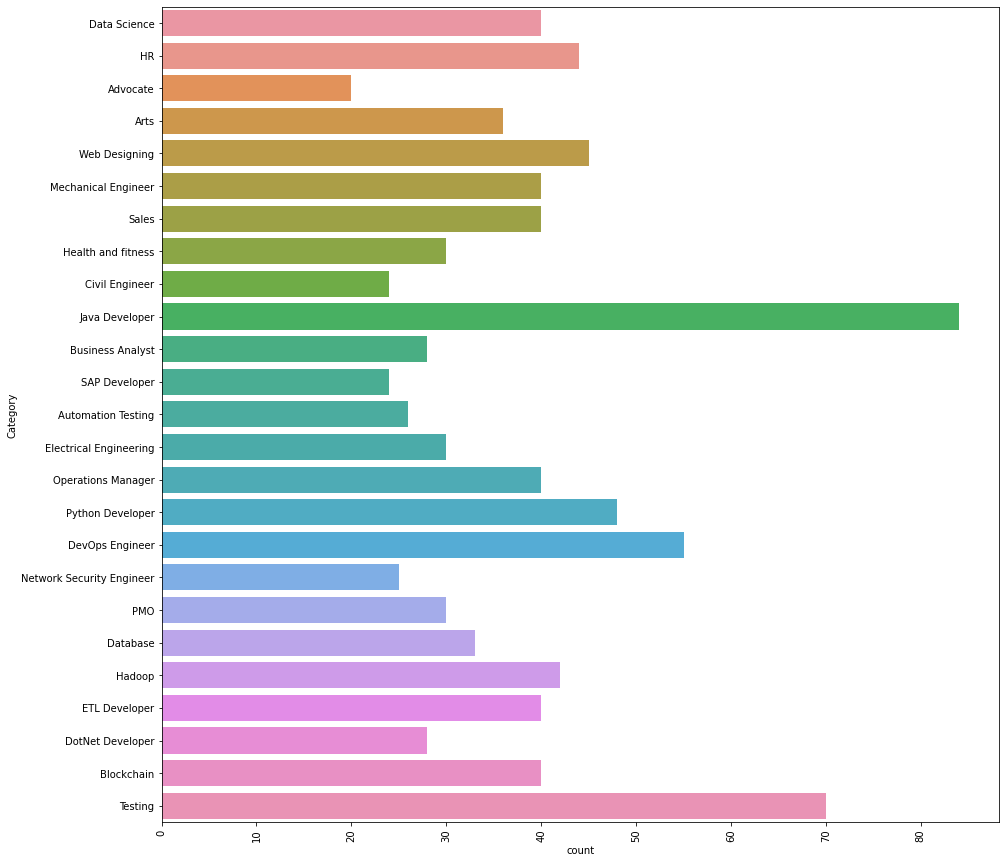

In [19]:
import seaborn as sns 
plt.figure(figsize =(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category',data= resumeDataset)

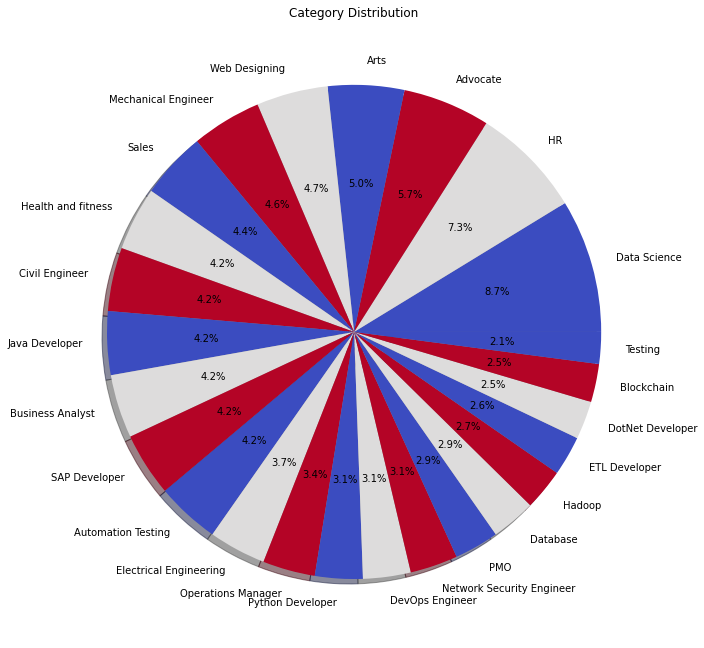

In [29]:

from matplotlib.gridspec import GridSpec
targetCounts = resumeDataset['Category'].value_counts()
targetLabels = resumeDataset['Category'].unique()

plt.figure(1,figsize=(25,25))
the_grid = GridSpec(2,2)

cmap= plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1], aspect =1, title ='Category Distribution')

souce_pie = plt.pie(targetCounts,labels =targetLabels, autopct= '%1.1f%%', shadow =True, colors= colors)
plt.show()

In [31]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    

In [33]:
resumeDataset['cleaned_resume'] = resumeDataset.Resume.apply(lambda x: cleanResume(x))

In [37]:
resumeDataset['cleaned_resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [41]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [43]:
import nltk 
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [44]:
onesetOfStopwords = set(stopwords.words('english')+['``',"''"])

In [45]:
onesetOfStopwords

{"''",
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over

In [46]:
totalWords =[]
Senetnces = resumeDataset['Resume'].values
cleanedSentences= ""
for i in range(0, 160):
    cleanedText = cleanResume(Senetnces[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in onesetOfStopwords and word not in string.punctuation:
            totalWords.append(word)

In [47]:
wordfreqdist = nltk.FreqDist(totalWords)


In [48]:
wordfreqdist

FreqDist({'Details': 484, 'Exprience': 446, 'months': 376, 'company': 330, 'description': 310, '1': 290, 'year': 232, 'January': 216, 'Less': 204, 'Data': 200, ...})

In [49]:
mostcommon = wordfreqdist.most_common(50)
mostcommon

[('Details', 484),
 ('Exprience', 446),
 ('months', 376),
 ('company', 330),
 ('description', 310),
 ('1', 290),
 ('year', 232),
 ('January', 216),
 ('Less', 204),
 ('Data', 200),
 ('data', 192),
 ('Skill', 166),
 ('Maharashtra', 166),
 ('6', 164),
 ('Python', 156),
 ('Science', 154),
 ('I', 146),
 ('Education', 142),
 ('College', 140),
 ('The', 126),
 ('project', 126),
 ('like', 126),
 ('Project', 124),
 ('Learning', 116),
 ('India', 114),
 ('Machine', 112),
 ('University', 112),
 ('Web', 106),
 ('using', 104),
 ('monthsCompany', 102),
 ('B', 98),
 ('C', 98),
 ('SQL', 96),
 ('time', 92),
 ('learning', 90),
 ('Mumbai', 90),
 ('Pune', 90),
 ('Arts', 90),
 ('A', 84),
 ('application', 84),
 ('Engineering', 78),
 ('24', 76),
 ('various', 76),
 ('Software', 76),
 ('Responsibilities', 76),
 ('Nagpur', 76),
 ('development', 74),
 ('Management', 74),
 ('projects', 74),
 ('Technologies', 72)]

In [ ]:
# Convert all strings to lowercase


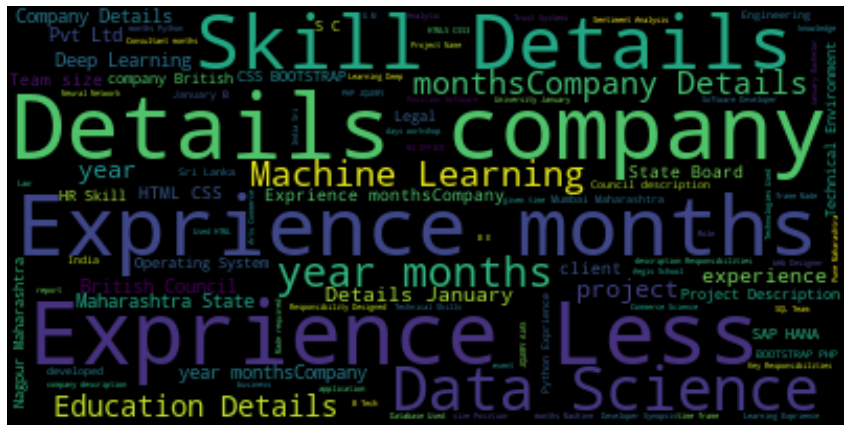

In [50]:
wc  = WordCloud().generate(cleanedSentences)
plt.figure(figsize =(15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataset[i]= le.fit_transform(resumeDataset[i])

In [52]:
resumeDataset

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack


In [57]:
requiredText = resumeDataset['cleaned_resume'].values
requiredtarget = resumeDataset['Category'].values
requiredtarget

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 22

In [60]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(WordFeatures,requiredtarget,random_state=0, test_size=0.2)

In [66]:
X_train.shape

(769, 1500)

In [67]:
X_test.shape

(193, 1500)

In [70]:

model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train,Y_train)
prediction = model.predict(X_test)


In [71]:
print('accuracy of KNNeighbors Classifier on training set :{:.2f}'.format(model.score(X_train,Y_train)))
print('accracy of KNeighbors Classifier on test set :{:.2f}'.format(model.score(X_test,Y_test)))

accuracy of KNNeighbors Classifier on training set :0.99
accracy of KNeighbors Classifier on test set :0.99


In [73]:
print('\n Classification report for classifier %s: \n%s\n'% (model,metrics.classification_report(Y_test,prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1